<a href="https://colab.research.google.com/github/moushumipriya/Global-E-commerce-Sales-Analysis/blob/main/Global_E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Data & Inspect

In [5]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12462 entries, 0 to 12461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    12462 non-null  object 
 1   StockCode    12462 non-null  object 
 2   Description  12417 non-null  object 
 3   Quantity     12461 non-null  float64
 4   InvoiceDate  12461 non-null  object 
 5   UnitPrice    12461 non-null  float64
 6   CustomerID   8956 non-null   float64
 7   Country      12461 non-null  object 
dtypes: float64(3), object(5)
memory usage: 779.0+ KB


,Quantity,UnitPrice,CustomerID
count,12461.000000,12461.000000,8956.000000
mean,7.477249,3.973280,15598.129299
std,93.885564,17.253932,1748.194062
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14307.000000
50%,2.000000,2.510000,15646.000000
75%,6.000000,4.210000,17211.000000
max,2880.000000,940.870000,18239.000000


Data Cleaning

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()

# Drop rows with missing CustomerID or InvoiceNo
df = df.dropna(subset=['CustomerID', 'InvoiceNo'])


Exploratory Data Analysis (EDA)

1.Top-selling products

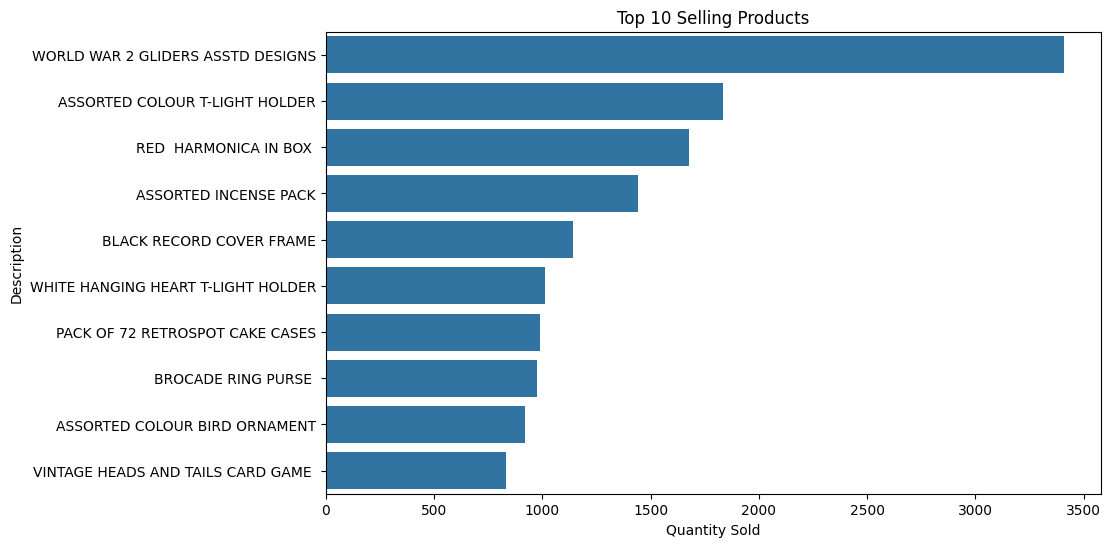

In [7]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")
plt.xlabel("Quantity Sold")
plt.show()


Country-wise sales

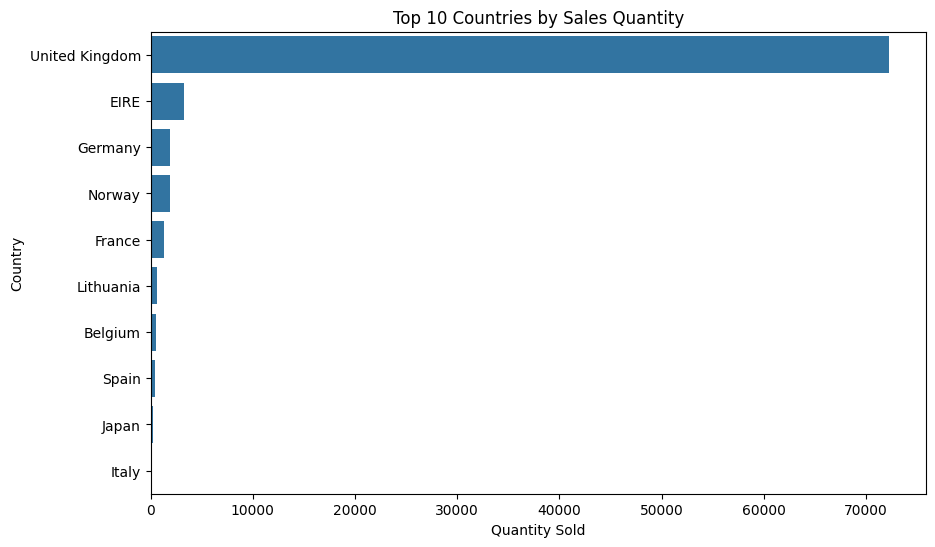

In [8]:
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Sales Quantity")
plt.xlabel("Quantity Sold")
plt.show()


Monthly Revenue Trend

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


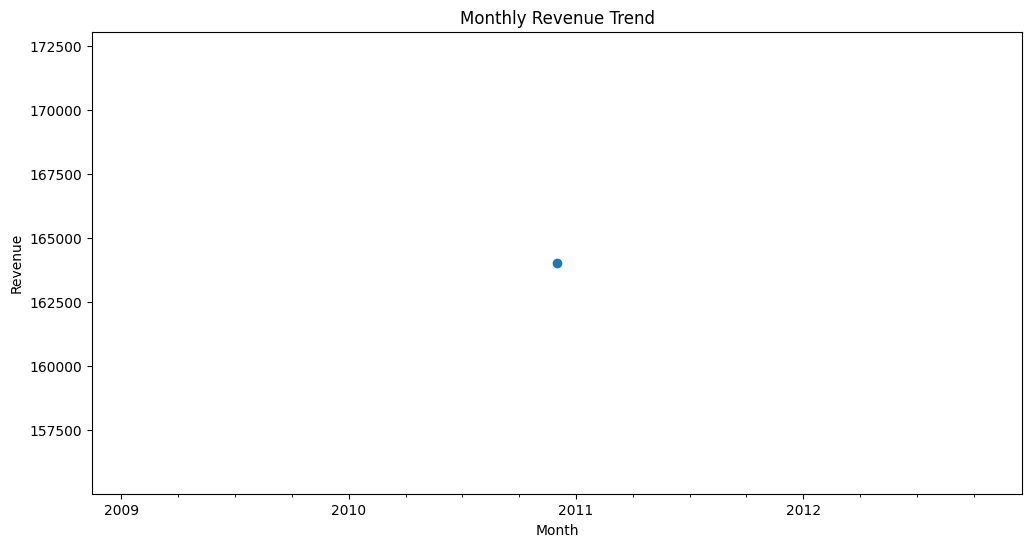

In [9]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Monthly revenue
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


Customer Purchase Frequency

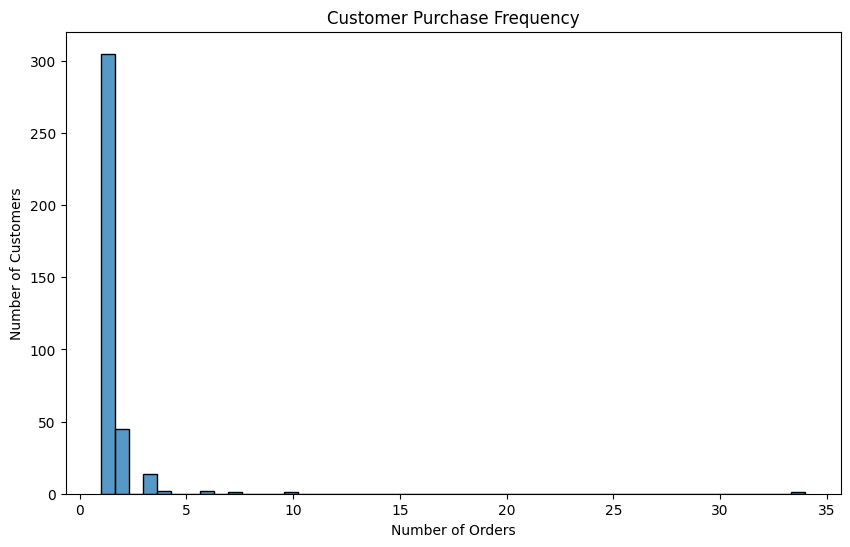

In [10]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10,6))
sns.histplot(customer_freq, bins=50, kde=False)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()
